In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as subplot
import matplotlib.pyplot as plt


In [2]:
title_basics = pd.read_csv('data/title.basics.tsv', delimiter='\t', encoding='utf-8')

/Users/huangzhisheng/miniconda2/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
title_basics_movie = title_basics[title_basics['titleType'] == 'movie']
#print title_basics_movie.head(10)
#print "Number of movies", title_basics_movie.shape[0]


In [72]:
title_basics_movie_genres = title_basics_movie[title_basics_movie.genres != '\N']
uid = title_basics_movie_genres['tconst']
title_basics_movie_genres = title_basics_movie_genres[title_basics_movie_genres['startYear'] != '\N']
title_basics_movie_genres = title_basics_movie_genres[title_basics_movie_genres['startYear'].astype('int') <= 2018]
#print title_basics_movie_genres.head(10)
#print uid[0:19]
#title_startYear = title_basics_movie_genres[title_basics_movie_genres['startYear'] != '\N']
#title_startYear = title_startYear[title_startYear['startYear'].astype('int') <= 2018]
#year = title_startYear['startYear']
#print year.sort_values().shape

print "Number of movies with genre values:", title_basics_movie_genres.shape


Number of movies with genre values: (364461, 9)


In [73]:
# copy from types_and_ratins.ipynb
def split_rows(data,column_name):
    '''
    input:
    data:an object of pandas.DataFrame whose rows need to be divided. type: pandas.DataFrame
    name_of_the_column: name of the column which we divide the rows by. type:string
    
    output:an object of pandas.DataFrame whose rows has been divided
    output type:pandas.DataFrame
    '''
    assert isinstance(column_name,str)
    
    tem=data[column_name].str.split(',',expand=True).stack().reset_index() #split the column and reindex
    tem.columns=['level_0','level_1','new_'+column_name]#name the new column
    res=pd.merge(tem,data,how='inner',left_on='level_0',right_index=True)#combine the column we just got with the raw dataset
    
    res=res.drop('level_0',1)#remove useless column
    res=res.drop('level_1',1)#remove useless column
    res=res.drop(column_name,1)#remove useless column
    
    return res

In [74]:
# genres contains all the genres in the dataset

movie_genres = split_rows(title_basics_movie_genres[['genres']], 'genres')
#print movie_genres


In [87]:
movies_per_genre = movie_genres.groupby(['new_genres'])['new_genres'].count()
movies_per_genre.name = 'Movies per genre'
movies_per_genre = movies_per_genre.sort_values()
print movies_per_genre
genre_others = movies_per_genre[movies_per_genre<8000]
print 'others', genre_others
type(genre_others)
print genre_others.shape
#genre_others.sum()

new_genres
Short               3
Game-Show          12
Talk-Show          50
Reality-TV        114
Film-Noir         850
News             1755
Sport            4083
Animation        5179
Western          6713
Sci-Fi           7090
War              7113
Adult            7430
Musical          8213
Music            8219
Fantasy          8766
History         10074
Mystery         10638
Biography       12184
Family          12742
Adventure       18724
Horror          19512
Thriller        23676
Crime           24608
Action          33221
Romance         33278
Comedy          76319
Documentary     84367
Drama          148674
Name: Movies per genre, dtype: int64
others new_genres
Short            3
Game-Show       12
Talk-Show       50
Reality-TV     114
Film-Noir      850
News          1755
Sport         4083
Animation     5179
Western       6713
Sci-Fi        7090
War           7113
Adult         7430
Name: Movies per genre, dtype: int64
(12,)


In [81]:
other_genres2 = []
for idx, val in enumerate(movies_per_genre.values):
    if val < 8000:
        other_genres2.append(idx)
print other_genres2       

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [82]:
movies_per_genre_wo_others = movies_per_genre.drop(genre_others.index).append(pd.Series([genre_others.sum()], index = ['Others']))

#movies_per_genre_wo_others =
print movies_per_genre_wo_others.shape

(17,)


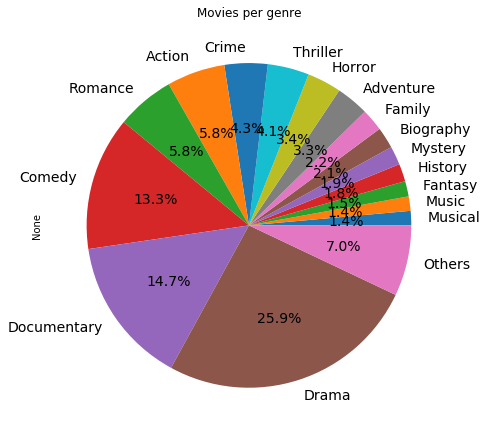

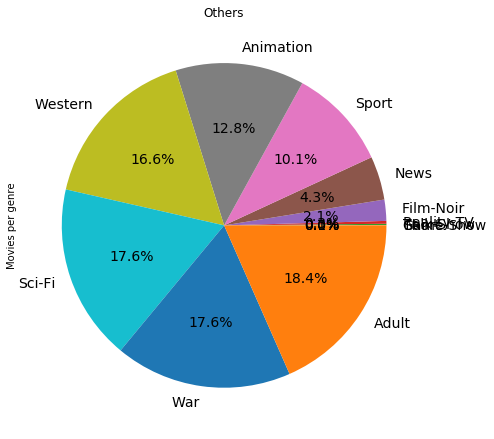

In [83]:
#movies_above_average = pd.DataFrame({'genres':movies_above_average.index, 'number':movies_above_average.values})
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
movies_per_genre_wo_others.plot(kind='pie', title = 'Movies per genre', ax=ax1, autopct='%1.1f%%', 
 startangle=0, shadow=False, legend = False, fontsize=14)
# print distribution in 'others'
plt.figure(figsize=(16,8))
ax2 = plt.subplot(121, aspect='equal')
genre_others.plot(kind='pie', title = 'Others', ax=ax2, autopct='%1.1f%%', 
 startangle=0, shadow=False, legend = False, fontsize=14)

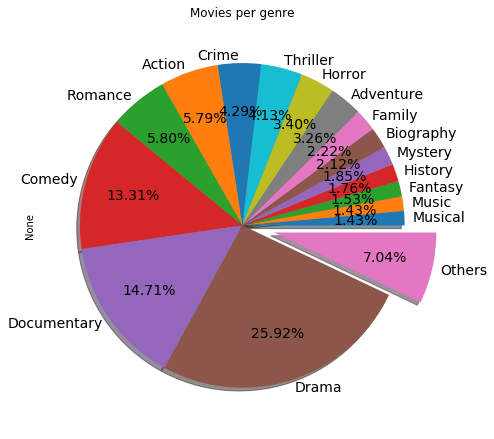

In [93]:
#[1, 3, 11, 12, 15, 16, 18, 19, 21, 22, 23, 24, 26, 27]
explodeTuple = (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2)
pieLabels = movies_per_genre_wo_others.index
plt.figure(figsize=(16,8))
axes = plt.subplot(121,aspect='equal')
#axes.pie(movies_per_genre_wo_others.values, explode=explodeTuple,labels=pieLabels,autopct='%1.2f%%',startangle=45,
       #  shadow=True, fontsize=14)
movies_per_genre_wo_others.plot(kind = 'pie',explode=explodeTuple,labels=pieLabels,autopct='%1.2f%%',startangle=0,
         shadow=True, fontsize=14,labeldistance=1.05,pctdistance = 0.7, title = 'Movies per genre')

Film-Noir      850
News          1755
Sport         4083
Animation     5179
Western       6713
Sci-Fi        7090
War           7113
Adult         7430
Short ect.     179
dtype: int64
Index([ u'Film-Noir',       u'News',      u'Sport',  u'Animation',
          u'Western',     u'Sci-Fi',        u'War',      u'Adult',
       u'Short ect.'],
      dtype='object')


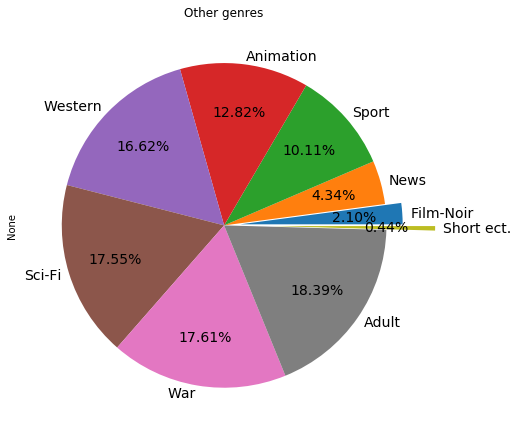

In [106]:
genre_others = genre_others.sort_values()

#print genre_others
grp = genre_others[genre_others<200]
genre_others_grp = genre_others.drop(grp.index).append(pd.Series([grp.sum()], index = ['Short ect.']))
print genre_others_grp
explodeTuple = (0.1,0,0,0,0,0,0,0,0.3)
pieLabels = genre_others_grp.index
print pieLabels
plt.figure(figsize=(16,8))
axes = plt.subplot(121,aspect='equal')
#axes.pie(movies_per_genre_wo_others.values, explode=explodeTuple,labels=pieLabels,autopct='%1.2f%%',startangle=45,
       #  shadow=True, fontsize=14)
genre_others_grp.plot(kind = 'pie',explode=explodeTuple,labels=pieLabels,autopct='%1.2f%%',startangle=0,
         shadow=False, fontsize=14,labeldistance=1.05,pctdistance = 0.7, title = 'Other genres')


new_genres
Drama          148674
Documentary     84367
Comedy          76319
Romance         33278
Action          33221
Crime           24608
Thriller        23676
Horror          19512
Adventure       18724
Family          12742
Biography       12184
Mystery         10638
History         10074
Fantasy          8766
Music            8219
Musical          8213
Adult            7430
War              7113
Sci-Fi           7090
Western          6713
Animation        5179
Sport            4083
News             1755
Film-Noir         850
Reality-TV        114
Talk-Show          50
Game-Show          12
Short               3
Name: Movies per genre, dtype: int64


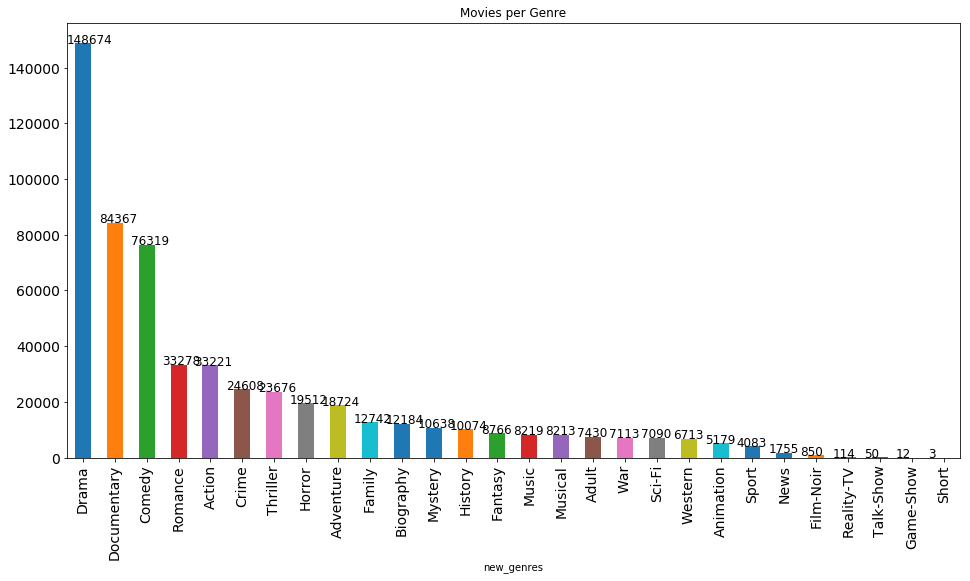

In [105]:
plt.figure(figsize=(16,8))
label = []
movies_per_genre = movies_per_genre.sort_values(ascending=False)
print movies_per_genre
for i in movies_per_genre:
    label.append(i)
for i in range(len(movies_per_genre)):
    plt.text(x = i-.5, y =movies_per_genre[i]+0.9, s = label[i], size = 12)  
movies_per_genre.plot(kind = 'bar', title='Movies per Genre', fontsize = 14)